In [168]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import matplotlib.pyplot as plt
import pyfolio as pf

import warnings 
warnings.filterwarnings('ignore')

In [169]:
# Obtain the BTC returns and truncate the NA value
df = yf.download('BTC-USD', start='2014-01-01')
df['Returns'] = np.log(df['Close'] / df['Close'].shift(1))
df.loc[df.index[0], 'Returns'] = 0

# Create the forecasts list to store the predictions
windowLength = 30
foreLength = len(df) - windowLength
forecasts = []



[*********************100%***********************]  1 of 1 completed


3214

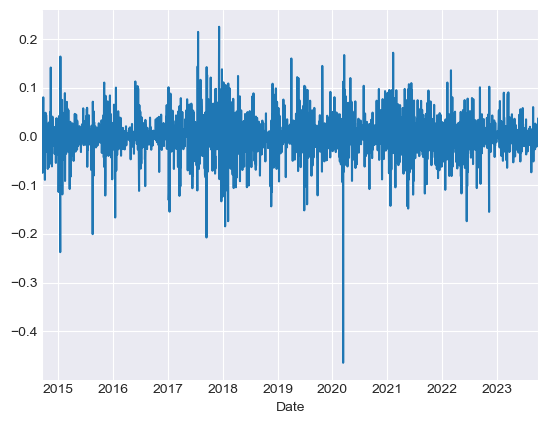

In [170]:
df['Returns'].plot()
foreLength

In [171]:
def rag_df_strategy(returns, windowLength=30, p_range=6, q_range=6):
    foreLength = len(returns) - windowLength
    forecasts = []

    for d in range(foreLength):
        ReturnsOffset = Returns.iloc[d:windowLength+d]

        # Fit the ARIMA model
        final_aic = float('inf')
        final_order = (0, 0, 0)
        for p in range(p_range):
            for q in range(q_range):
                if p == 0 and q == 0:
                    continue
                try:
                    arima_model = ARIMA(ReturnsOffset, order=(p, 0, q)).fit()
                    current_aic = arima_model.aic
                    if current_aic < final_aic:
                        final_aic = current_aic
                        final_order = (p, 0, q)
                        
                except:
                    continue
                print(final_order)

        # Specify and fit the GARCH model
        try:
            garch_model = arch_model(ReturnsOffset, vol='Garch', p=final_order[0], q=final_order[2], dist='skewt')
            fit = garch_model.fit(disp='off')
            
            # Forecasting
            fore = fit.forecast(horizon=1)
            if fore.mean.iloc[-1].item() < 0:
                direction = -1
            else:
                direction = 1
            forecasts.append((ReturnsOffset.index[-1], direction))
        except:
            forecasts.append((ReturnsOffset.index[-1], 0))

    return forecasts


In [172]:
forecasts = rag_df_strategy(gspc['Returns'])

(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)


(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)


(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)


(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 1)


(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)


(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(5, 0, 0)
(5, 0, 0)
(5, 0, 0)
(5, 0, 0)
(5, 0, 0)
(5, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(5, 0, 0)
(5, 0, 1)


(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)


(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(0, 0, 5)
(0, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)


(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)


(3, 0, 0)
(3, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(0, 0, 5)
(0, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(3, 0, 0)
(3, 0, 0)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(1, 0, 2)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 3)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 3)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(0, 0, 1)
(0, 0, 2)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 3)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)


(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)


(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(2, 0, 3)
(2, 0, 3)
(2, 0, 3)
(2, 0, 3)
(2, 0, 3)
(2, 0, 3)
(2, 0, 3)
(2, 0, 3)
(2, 0, 3)
(2, 0, 3)
(2, 0, 3)
(2, 0, 3)
(2, 0, 3)
(2, 0, 3)
(2, 0, 3)
(2, 0, 3)
(2, 0, 3)
(2, 0, 3)
(2, 0, 3)
(2, 0, 3)
(2, 0, 3)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(2, 0, 3)


(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(0, 0, 1)
(0, 0, 2)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)


(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)


(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 0)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 4)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)


(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(5, 0, 0)
(5, 0, 0)
(5, 0, 0)
(5, 0, 0)
(5, 0, 0)
(5, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)


(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)


(2, 0, 4)
(2, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(2, 0, 2)
(2, 0, 2)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(2, 0, 2)
(2, 0, 2)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)
(2, 0, 4)


(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)


(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)


(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(5, 0, 0)
(5, 0, 0)
(5, 0, 0)
(5, 0, 0)
(5, 0, 0)
(5, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)
(1, 0, 4)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(0, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(5, 0, 0)
(5, 0, 0)
(5, 0, 0)
(5, 0, 0)
(5, 0, 0)
(5, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(5, 0, 1)
(5, 0, 1)
(5, 0, 1)
(5, 0, 1)
(5, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(5, 0, 0)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)


(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)


(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)


(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)


(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(4, 0, 5)
(4, 0, 5)
(4, 0, 5)
(4, 0, 5)
(4, 0, 5)
(4, 0, 5)
(4, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(4, 0, 5)
(4, 0, 5)
(5, 0, 1)
(5, 0, 1)
(5, 0, 1)
(5, 0, 1)
(5, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)


(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)


(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(3, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(2, 0, 0)
(2, 0, 0)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)


(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 5)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(3, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 1)
(0, 0, 2)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(2, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)


(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(1, 0, 3)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)


(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)


(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(1, 0, 5)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)


(0, 0, 3)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(3, 0, 3)
(3, 0, 3)
(3, 0, 3)
(3, 0, 3)
(3, 0, 3)
(3, 0, 3)
(3, 0, 3)
(3, 0, 3)
(3, 0, 3)
(3, 0, 3)
(3, 0, 3)
(3, 0, 3)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)


(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(1, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 3)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(0, 0, 5)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(2, 0, 2)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)


(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 2)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)


(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(4, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 4)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(2, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(2, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(0, 0, 2)
(1, 0, 0)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


/Users/igor_gim/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(1, 0, 0)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)


(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(0, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)
(1, 0, 1)


In [173]:
forecasts

[(Timestamp('2014-10-16 00:00:00'), 0),
 (Timestamp('2014-10-17 00:00:00'), 0),
 (Timestamp('2014-10-18 00:00:00'), -1),
 (Timestamp('2014-10-19 00:00:00'), 0),
 (Timestamp('2014-10-20 00:00:00'), 0),
 (Timestamp('2014-10-21 00:00:00'), 0),
 (Timestamp('2014-10-22 00:00:00'), 0),
 (Timestamp('2014-10-23 00:00:00'), 0),
 (Timestamp('2014-10-24 00:00:00'), 0),
 (Timestamp('2014-10-25 00:00:00'), 0),
 (Timestamp('2014-10-26 00:00:00'), 0),
 (Timestamp('2014-10-27 00:00:00'), 0),
 (Timestamp('2014-10-28 00:00:00'), -1),
 (Timestamp('2014-10-29 00:00:00'), -1),
 (Timestamp('2014-10-30 00:00:00'), -1),
 (Timestamp('2014-10-31 00:00:00'), -1),
 (Timestamp('2014-11-01 00:00:00'), -1),
 (Timestamp('2014-11-02 00:00:00'), -1),
 (Timestamp('2014-11-03 00:00:00'), 1),
 (Timestamp('2014-11-04 00:00:00'), 1),
 (Timestamp('2014-11-05 00:00:00'), 1),
 (Timestamp('2014-11-06 00:00:00'), 1),
 (Timestamp('2014-11-07 00:00:00'), -1),
 (Timestamp('2014-11-08 00:00:00'), -1),
 (Timestamp('2014-11-09 00:00:0

In [174]:
# Output the CSV file to "forecasts.csv"
forecasts_df = pd.DataFrame(forecasts, columns=['Date', 'Forecast'])
forecasts_df.to_csv('forecasts.csv', index=False)




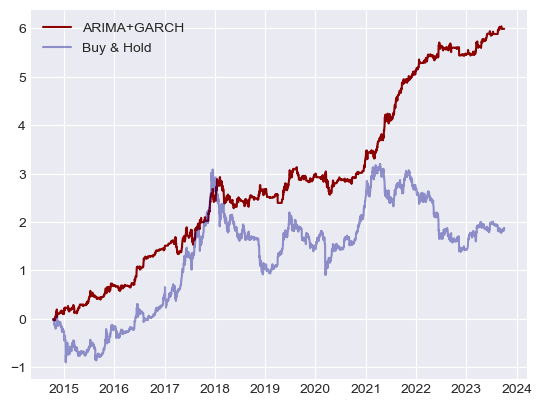

In [175]:
# Input the Python-refined CSV file
ArimaGarch = pd.read_csv('forecasts.csv', parse_dates=True, index_col=0)

# Create the ARIMA+GARCH returns
Intersect = pd.merge(ArimaGarch, df['Returns'], left_index=True, right_index=True, how='inner')
ArimaGarchReturns = Intersect.iloc[:, 0] * Intersect.iloc[:, 1]

# Create the backtests for ARIMA+GARCH and Buy & Hold
ArimaGarchCurve = np.log((1 + ArimaGarchReturns).cumprod())
BuyHoldCurve = np.log((1 + Intersect.iloc[:, 1]).cumprod())

# # Plot the equity curves
# plt.plot(ArimaGarchCurve, color='darkred', label='ARIMA+GARCH')
# plt.plot(BuyHoldCurve, color='darkblue', label='Buy & Hold', alpha=0.4)
# plt.legend()
# plt.show()

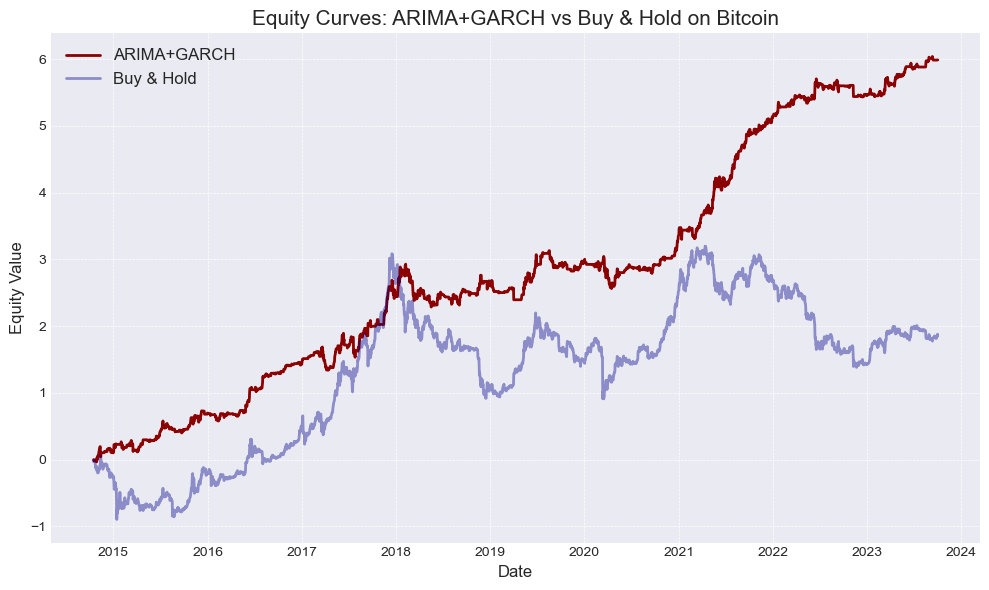

In [192]:
# Plot the equity curve
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-darkgrid')

plt.plot(ArimaGarchCurve, color='darkred', label='ARIMA+GARCH', linewidth=2)
plt.plot(BuyHoldCurve, color='darkblue', label='Buy & Hold', linewidth=2, alpha=0.4)

plt.title("Equity Curves: ARIMA+GARCH vs Buy & Hold on Bitcoin", fontsize=15)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Equity Value", fontsize=12)

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Start date,2014-10-16
End date,2023-10-02
Total months,155
,Backtest
Annual return,58.6%
Cumulative returns,39773.8%
Annual volatility,40.3%
Sharpe ratio,1.35
Calmar ratio,1.24
Stability,0.95
Max drawdown,-47.4%


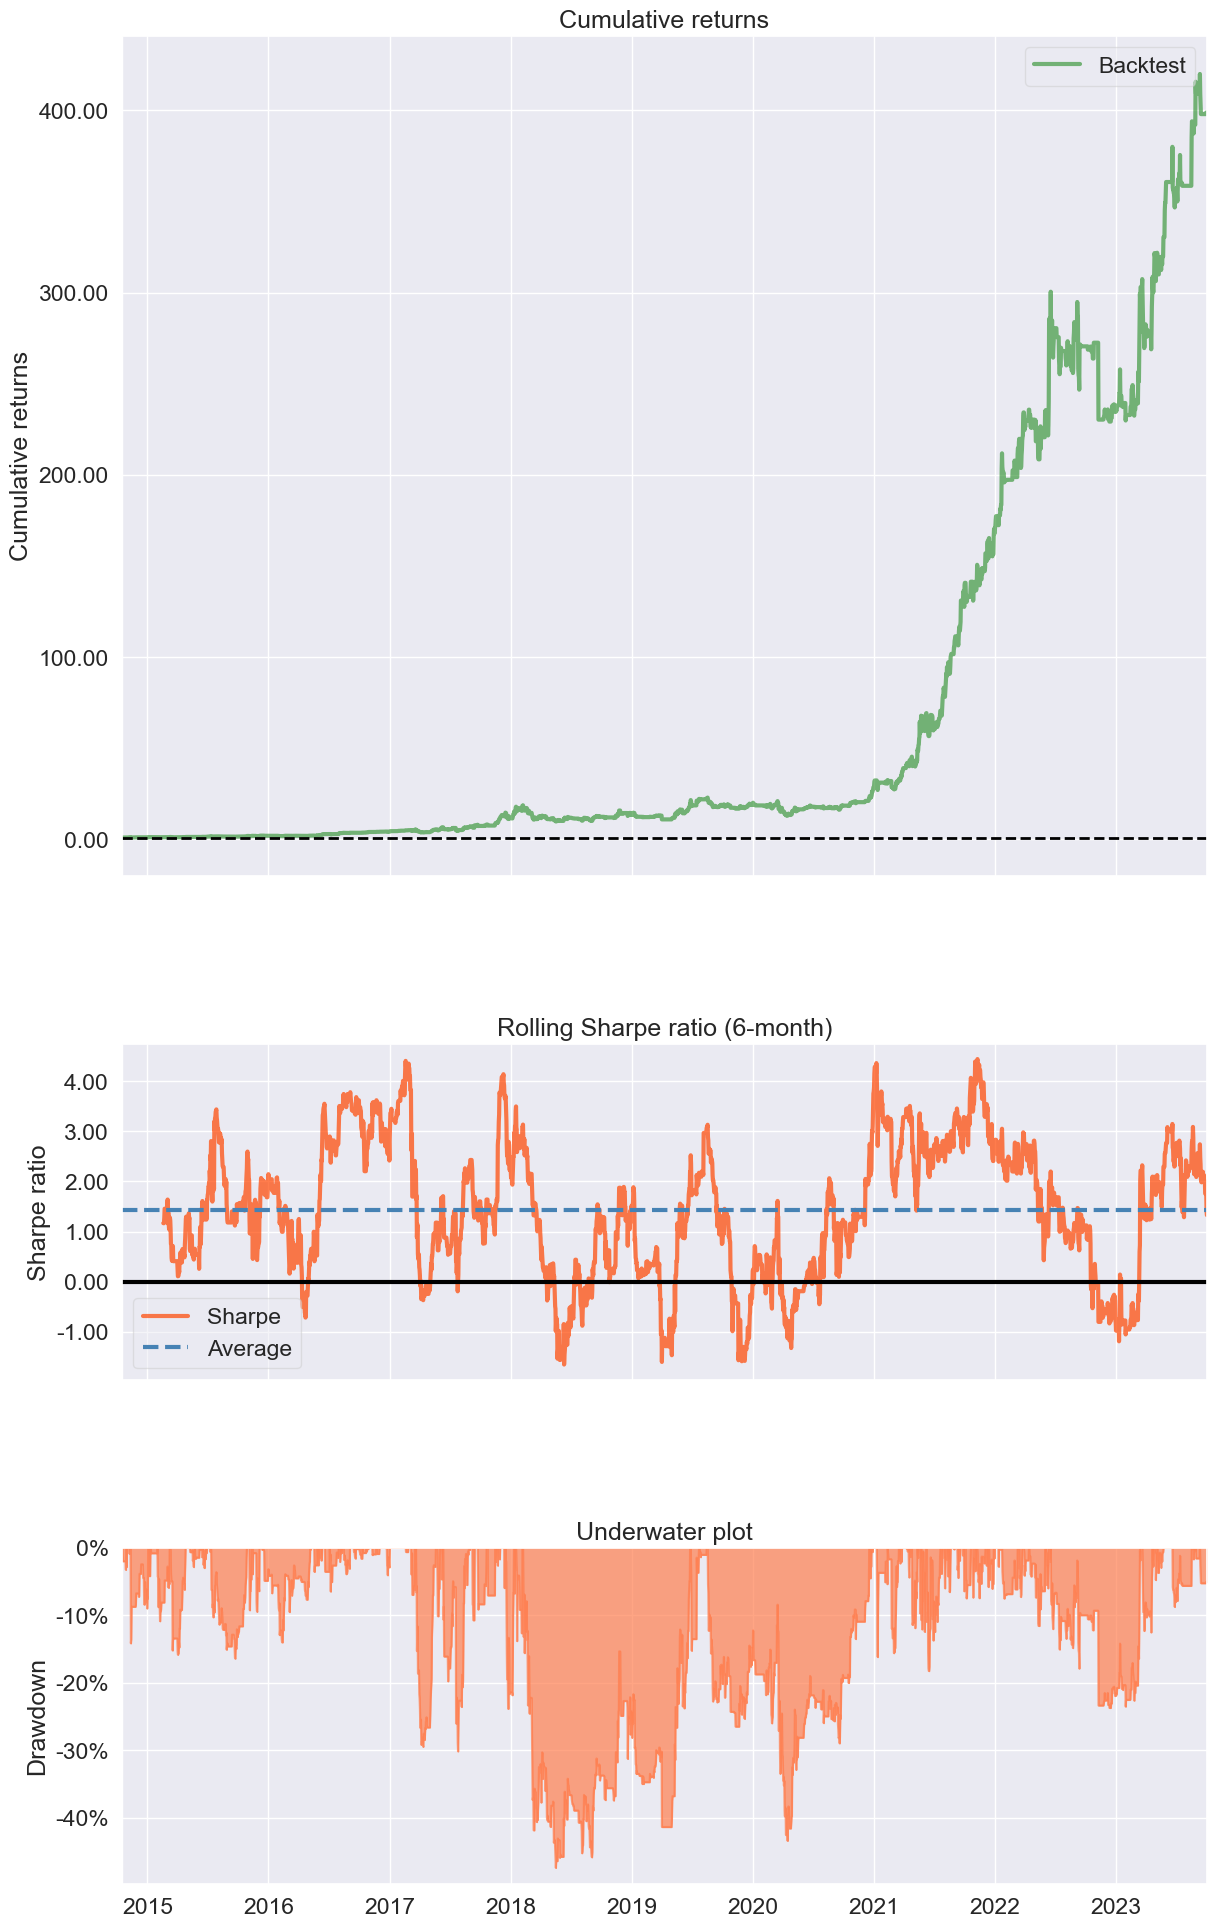

In [178]:
pf.create_simple_tear_sheet(ArimaGarchReturns)